In [1]:
import os
os.chdir('../')
import numpy as np
from tabulate import tabulate

from utils import load_csv, load_pkl, generate_all_metrics
from plotting import plot_modis_scatter, plot_cams_scatter

import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

MODIS eval

In [2]:
actual = load_pkl('../data/results/modis/actual.pkl')
mask = ~np.isnan(actual)
actual = actual[mask]
baseline = load_pkl('../data/results/modis/baseline.pkl')
baseline = baseline[mask]
preds = load_pkl('../data/results/modis/preds.pkl')
preds = preds[mask]

In [3]:
datasets = {'HR DS (baseline)': baseline, 'HR DS (CNN)': preds}
print(tabulate(generate_all_metrics(datasets, actual), headers=['Data', 'KGE', 'MSE', 'NMBE'], tablefmt='grid'))

+------------------+----------+------------+-----------+
| Data             |      KGE |        MSE |      NMBE |
+==================+==========+============+===========+
| HR DS (baseline) | 0.57149  | 0.00769162 | 0.0169679 |
+------------------+----------+------------+-----------+
| HR DS (CNN)      | 0.938913 | 0.0052526  | 0.039413  |
+------------------+----------+------------+-----------+


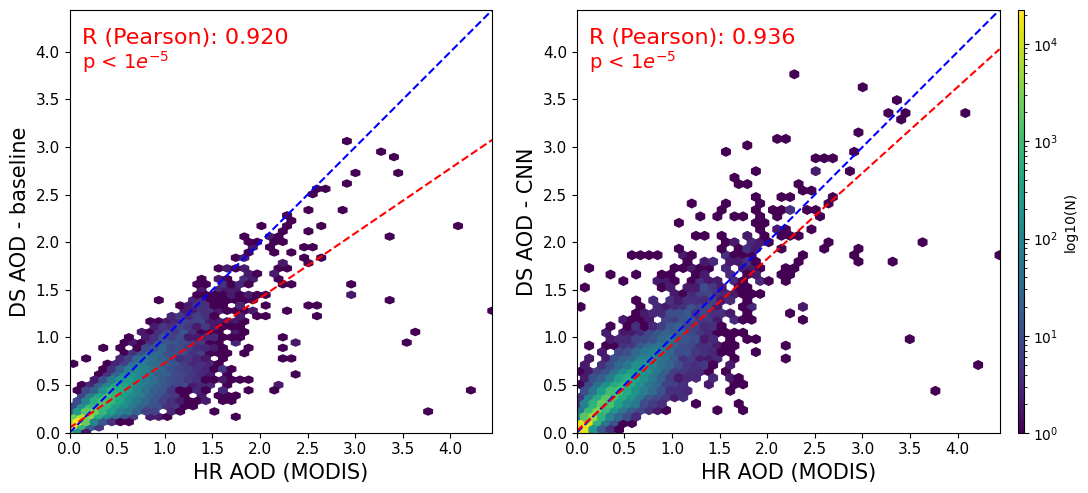

In [4]:
index = np.random.choice(actual.shape[0], 100000, replace=False)  
actual_sampled = actual[index]
preds_sampled = preds[index]
baseline_sampled = baseline[index]
plot_modis_scatter(actual_sampled, baseline_sampled, preds_sampled, save_path = "plots")

CAMS eval

In [5]:
actual = load_pkl('../data/results/cams/actual.pkl')
mask = ~np.isnan(actual)
actual = np.array(actual)[mask]
lr = load_pkl('../data/results/cams/lr.pkl')
lr = np.array(lr)[mask]
baseline = load_pkl('../data/results/cams/baseline.pkl')
baseline = np.array(np.concatenate(baseline))
baseline = baseline[mask]
preds = load_pkl('../data/results/cams/preds.pkl')
preds = np.array(np.concatenate(preds))
preds = preds[mask]

In [6]:
datasets = {'LR': lr, 'HR DS (baseline)': baseline, 'HR DS (CNN)': preds}
print(tabulate(generate_all_metrics(datasets, actual), headers=['Data', 'KGE', 'MSE', 'NMBE'], tablefmt='grid'))

+------------------+----------+-----------+-----------+
| Data             |      KGE |       MSE |      NMBE |
+==================+==========+===========+===========+
| LR               | 0.645953 | 0.0752003 | 0.203047  |
+------------------+----------+-----------+-----------+
| HR DS (baseline) | 0.758077 | 0.0658267 | 0.0922343 |
+------------------+----------+-----------+-----------+
| HR DS (CNN)      | 0.738099 | 0.0688025 | 0.0980719 |
+------------------+----------+-----------+-----------+


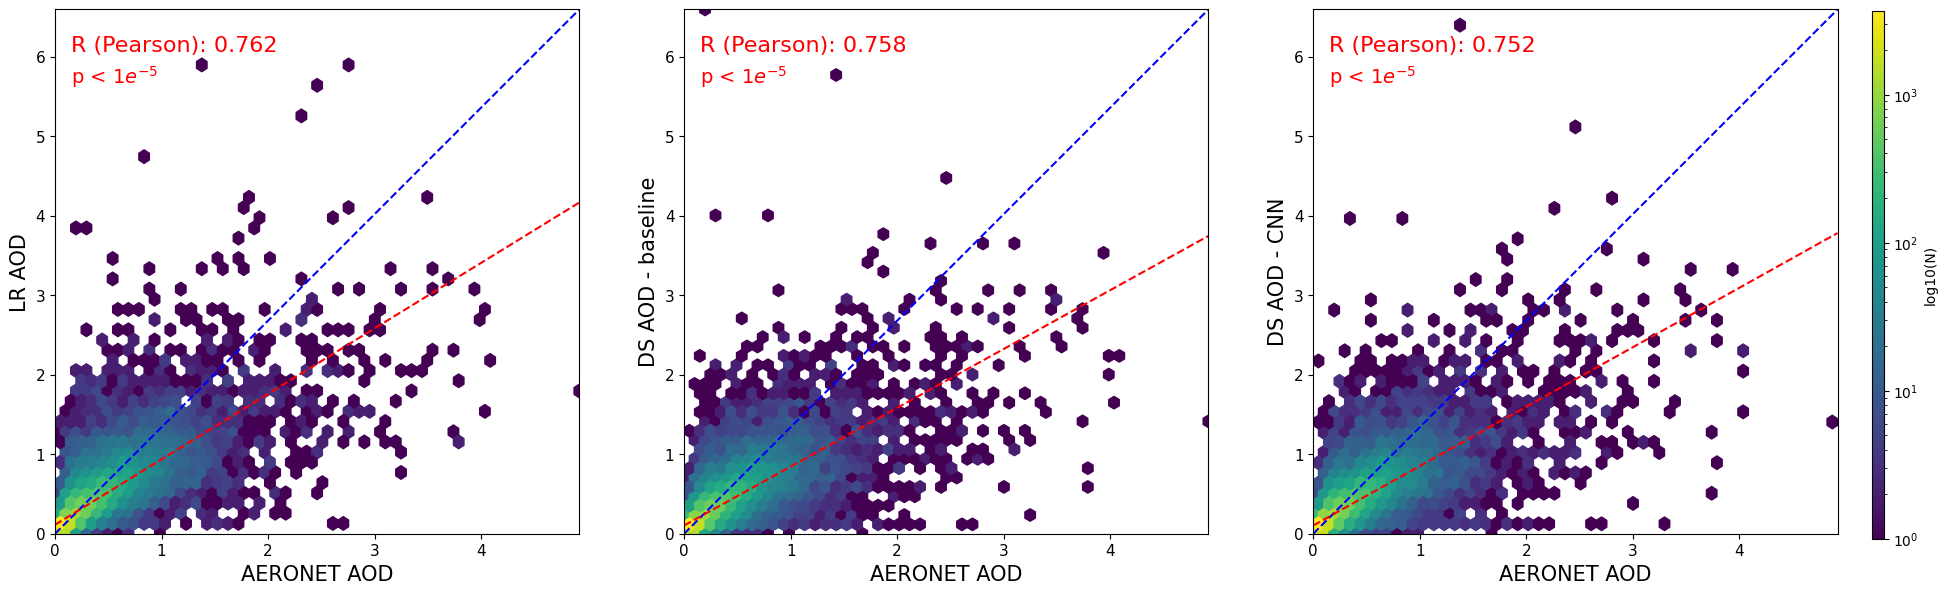

In [7]:
plot_cams_scatter(actual, lr, baseline, preds, save_path = "plots")